# USe astropy to analyze FITS images

based on a tutorial by Lia Corrales

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Open the FITS file

In [3]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


## Generally, the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list.

In [4]:
image_data = hdu_list[0].data

### Our data is now stored as a 2D numpy attay. But how do we know the dimensions of the image? We can simply look at the shape of the array

In [5]:
print(type(image_data))
print(image_data.shape)


<class 'numpy.ndarray'>
(893, 891)


### At this point, we can close the FITS file because we've stored everytying we wanted to a variable

In [6]:
hdu_list.close()

### short: use "getdata()" to just read in the image data and close the file

In [7]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


### Le's see that daaaata 

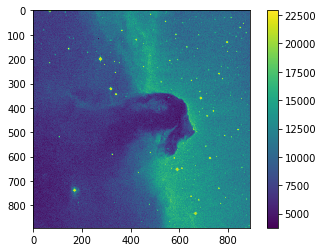

In [24]:
plt.imshow(image_data, cmap='viridis')
plt.colorbar()

### Let's get some basic stats about our image:

In [25]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
mean: 9831.481676287574
Stdev: 3032.3927542049046


### plotting a histogram
To make a histogram with matplotlib.pyplot.hist(), We'll need to cast the datat from a 2D array to something one dimensional

In this case, let's use the ndarray.flatten() to return to a 1D numpy array.

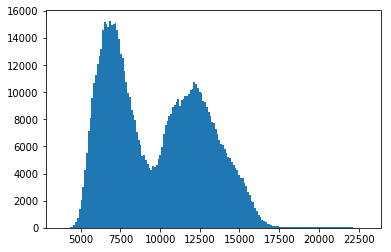

In [26]:
histogram = plt.hist(image_data.flatten(), bins='auto')

### Displaying the image with a logarithmi scale

what if we want to use a logarithmic color scale? to do so, we can load the LogNorm object from matplotlib

In [27]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

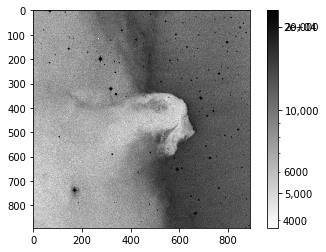

In [28]:
plt.imshow(image_data, cmap='binary', norm=LogNorm())

#choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

## since the noise in an image results from a random process, we use stacking of separate images to improve the signal to noise ration of objects we observe. Here we are going to stack 5 images of M13 taken with a 10 inch telescope.

In [29]:
#make a list of filenames
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits',\
             'M13_blue_0004.fits','M13_blue_0005.fits']

In [30]:
#make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

In [31]:
#sum the image together
final_image = np.sum(image_concat, axis=0)

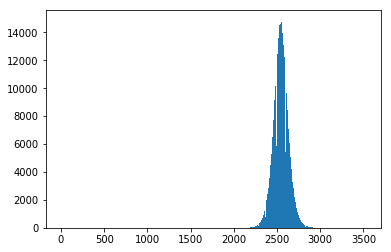

In [33]:
#plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(), bins='auto')

use the keywords vmin and vmax to set limits on the color scaling for imshow.

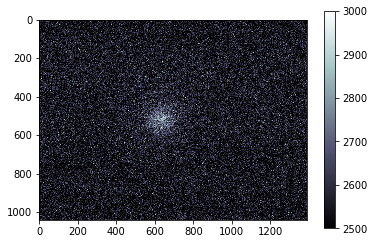

In [40]:
plt.imshow(final_image, cmap='bone', vmin=2.5E3, vmax=3E3)
plt.colorbar()

### writing a new FITS file

We can easily do this with the writeto() method

In [41]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)